# Data Import

The dataset has been taken from "Public Health Ontario". Dataset related to chronic diseased "Hypertension", "COPD" and "diabetes" is taken to analyse the relationship between each chronic disease.

In [1]:
##importing necessary libraries for our analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
## now through read_excel reading our chronic disease dataset
chronic = pd.read_excel('Chronic_Disease.xlsx', skiprows = 2)
## here we are skipping the first two rows from the excel file, as those rows consists of unwanted data for this analysis say description or the title of the data

# Data Cleaning and Preprocessing

##Data Cleaning

In [3]:
chronic.head() #lets see what our data says

,Indicator,Measure,Year,Geography,Rate,95% Confidence Interval,Count,Population,Significance Compared to Ontario,"Suppression flag (§ = As per data sharing agreement, results with small case counts between 1 and 4 have been suppressed)"
0,Incidence of asthma,Age-standardized rate (both sexes),2013,Algoma Public Health,374.2,(337.2-411.2),410.0,110890.0,Lower,NaN
1,Incidence of asthma,Age-standardized rate (both sexes),2014,Algoma Public Health,402.3,(363.9-440.6),444.0,109695.0,Lower,NaN
2,Incidence of asthma,Age-standardized rate (both sexes),2015,Algoma Public Health,412.8,(373.3-452.2),442.0,108738.0,No,NaN
3,Incidence of asthma,Age-standardized rate (both sexes),2016,Algoma Public Health,327.2,(292.0-362.4),349.0,108295.0,Lower,NaN
4,Incidence of asthma,Age-standardized rate (both sexes),2017,Algoma Public Health,319.3,(284.7-353.8),350.0,108127.0,Lower,NaN


In [4]:
chronic = chronic.iloc[:, :-1] # excluding the last column as it doesnot sahre any information

In [5]:
chronic.info() #provides major informations like rows, columns datatype of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44520 entries, 0 to 44519
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Indicator                         44520 non-null  object 
 1   Measure                           44520 non-null  object 
 2   Year                              44520 non-null  int64  
 3   Geography                         44520 non-null  object 
 4   Rate                              44499 non-null  float64
 5   95% Confidence Interval           44499 non-null  object 
 6   Count                             44499 non-null  float64
 7   Population                        44499 non-null  float64
 8   Significance Compared to Ontario  36019 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 3.1+ MB


Our data has total of 9 columns and 44520 rows altogether. Here "Significance Compared to Ontario" rows has significant number of missing value rows. However for our particular analysis this row doesnot provide any information, so this feature is not important, instead of working with these missing rows, we will simply drop this column for now.

In [6]:
chronic = chronic.drop(columns = 'Significance Compared to Ontario')

Okay for our analysis, we will be focusing only on ONTARIO Geographical Units.

In [7]:
chronic = chronic[(chronic['Geography'] == 'Ontario')]

In [8]:
chronic['Geography'].unique()

array(['Ontario'], dtype=object)

In [9]:
chronic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1060 entries, 340 to 44449
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Indicator                1060 non-null   object 
 1   Measure                  1060 non-null   object 
 2   Year                     1060 non-null   int64  
 3   Geography                1060 non-null   object 
 4   Rate                     1060 non-null   float64
 5   95% Confidence Interval  1060 non-null   object 
 6   Count                    1060 non-null   float64
 7   Population               1060 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 74.5+ KB


Now lets check for missing rows, we know that there are no missing value rows from the information provided by above query. We can check in another way as well i.e.

In [10]:
chronic.isnull().sum()

,0
Indicator,0
Measure,0
Year,0
Geography,0
Rate,0
95% Confidence Interval,0
Count,0
Population,0


No missing values in our data.

In [11]:
chronic.info() ##now we have our data intact without any missing values

<class 'pandas.core.frame.DataFrame'>
Index: 1060 entries, 340 to 44449
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Indicator                1060 non-null   object 
 1   Measure                  1060 non-null   object 
 2   Year                     1060 non-null   int64  
 3   Geography                1060 non-null   object 
 4   Rate                     1060 non-null   float64
 5   95% Confidence Interval  1060 non-null   object 
 6   Count                    1060 non-null   float64
 7   Population               1060 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 74.5+ KB


Now Checking for any Duplicated values in the dataset, as the duplicates will impact our analysis results.

In [12]:
chronic.duplicated().sum() ## there are no duplicates in our data

np.int64(0)

We will not be checking outliers in our dataset. Our data is not a patient level data, however is aggregated data from public health ontario. There is likely minimal cases of outliers than in the patient level data, so we will skip this step.

##Data Preprocessing

We have one dataset i.e. Chronic, this particular dataset has all data for our chronic disease that we are working with i.e. "Hypertension", "Diabetes" and "COPD". We have to differentiate these. Also We will do our statistical model analysis based on "Age Standardized" Measure so we will be excluding other Measures as well.

In [13]:
chronic['Indicator'].unique()
##Also we have Incidence and Prevalence data for each chronic disease
##For our analysis we will be going through Prevalence Data

array(['Incidence of asthma', 'Prevalence of asthma',
       'Incidence of COPD in adults 20+',
       'Prevalence of COPD in adults 20+',
       'Incidence of diabetes in adults 20+',
       'Prevalence of diabetes in adults 20+',
       'Incidence of hypertension in adults 20+',
       'Prevalence of hypertension in adults 20+'], dtype=object)

In [14]:
hypertension = chronic[chronic['Indicator'] == 'Prevalence of hypertension in adults 20+']
COPD = chronic[chronic['Indicator'] == 'Prevalence of COPD in adults 20+']
diabetes = chronic[chronic['Indicator'] == 'Prevalence of diabetes in adults 20+']

## we have successfully divided our dataset.

So that there wont be any confusion as all the datsets have same column names, lets rename those as well. We will only change the names of the columns we will be using further in our analysis.

In [15]:
hypertension = hypertension.rename(
    columns = {
        'Rate' : 'Hypertension_Rate',
        'Count' : 'Hypertension_Count',
        'Population' : 'Hypertension_Population'
    }
)

In [16]:
COPD = COPD.rename(
    columns = {
        'Rate' : 'COPD_Rate',
        'Count' : 'COPD_Count',
        'Population' : 'COPD_Population'
    }
)

In [17]:
diabetes = diabetes.rename(
    columns = {
        'Rate' : 'Diabetes_Rate',
        'Count' : 'Diabetes_Count',
        'Population' : 'Diabetes_Population'
    }
)

Now creating a different dataframe for each having only the AGE STANDARDIZED data. This main data that we have created we will use this for descriptive analysis while EDA. So instead of changing the same, lets create a new Dataframe.

In [18]:
hypertension_as = hypertension[hypertension['Measure'] == 'Age-standardized rate (both sexes)']
COPD_as = COPD[COPD['Measure'] == 'Age-standardized rate (both sexes)']
diabetes_as = diabetes[diabetes['Measure'] == 'Age-standardized rate (both sexes)']

Then lets create our final dataframe, merging all these  data, for our statistical model analysis that we will do after we complete out EDA.

In [19]:
df = hypertension_as.merge(COPD_as[['COPD_Rate', 'COPD_Count', 'COPD_Population', 'Year', 'Geography']], on = ['Year', 'Geography'], how = 'left')\
                    .merge(diabetes_as[['Diabetes_Rate', 'Diabetes_Count', 'Diabetes_Population', 'Year', 'Geography']], on = ['Year', 'Geography'], how = 'left')

In [20]:
df.info() ## so our final dataframe that we will be working is ready

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Indicator                10 non-null     object 
 1   Measure                  10 non-null     object 
 2   Year                     10 non-null     int64  
 3   Geography                10 non-null     object 
 4   Hypertension_Rate        10 non-null     float64
 5   95% Confidence Interval  10 non-null     object 
 6   Hypertension_Count       10 non-null     float64
 7   Hypertension_Population  10 non-null     float64
 8   COPD_Rate                10 non-null     float64
 9   COPD_Count               10 non-null     float64
 10  COPD_Population          10 non-null     float64
 11  Diabetes_Rate            10 non-null     float64
 12  Diabetes_Count           10 non-null     float64
 13  Diabetes_Population      10 non-null     float64
dtypes: float64(9), int64(1), obje

# Exploratory Data Analysis (EDA) / Descriptive Analysis

In [21]:
df.describe()

,Year,Hypertension_Rate,Hypertension_Count,Hypertension_Population,COPD_Rate,COPD_Count,COPD_Population,Diabetes_Rate,Diabetes_Count,Diabetes_Population
count,10.00000,10.000000,1.000000e+01,1.000000e+01,10.000000,10.000000,1.000000e+01,10.000000,1.000000e+01,1.000000e+01
mean,2017.50000,25762.190000,3.170309e+06,1.167018e+07,7636.750000,942041.200000,1.167018e+07,11627.390000,1.426450e+06,1.167018e+07
std,3.02765,711.003123,1.319515e+05,5.268123e+05,321.725274,34346.421705,5.268123e+05,325.375812,1.332287e+05,5.268123e+05
min,2013.00000,24750.400000,2.969787e+06,1.094689e+07,7002.600000,876186.000000,1.094689e+07,11102.600000,1.228798e+06,1.094689e+07
25%,2015.25000,25242.150000,3.067032e+06,1.123549e+07,7486.325000,921008.500000,1.123549e+07,11421.700000,1.325031e+06,1.123549e+07
50%,2017.50000,25765.350000,3.181223e+06,1.166757e+07,7770.000000,957630.500000,1.166757e+07,11650.450000,1.430515e+06,1.166757e+07
75%,2019.75000,26361.600000,3.262977e+06,1.200591e+07,7880.775000,967033.000000,1.200591e+07,11847.175000,1.518550e+06,1.200591e+07
max,2022.00000,26756.800000,3.370130e+06,1.252619e+07,7921.300000,977942.000000,1.252619e+07,12112.500000,1.630037e+06,1.252619e+07


Visualizing chronic disease Rates over year by Geography for each chronic disease : HYpertension, Diabeties and COPD.

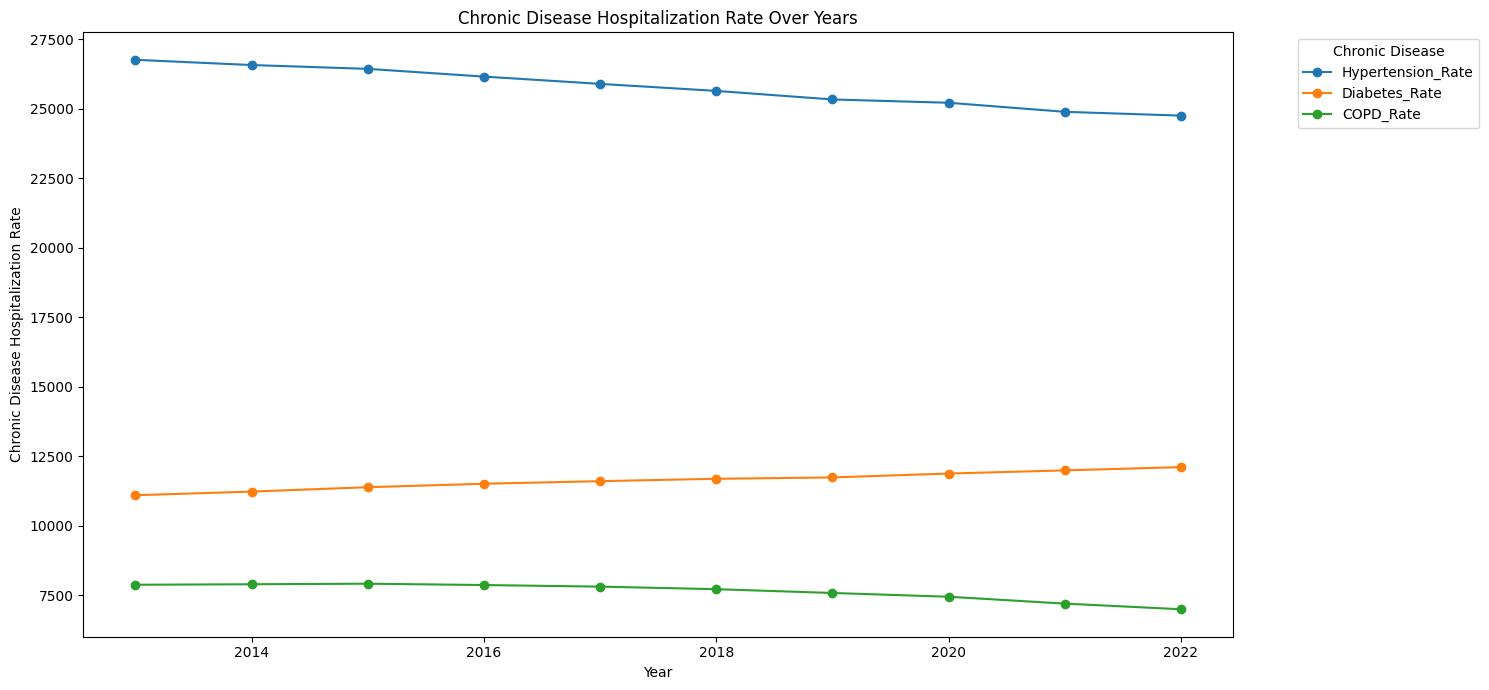

In [22]:
#we only need year and rate for this chart
hypertensionchart = hypertension_as[['Year','Hypertension_Rate']]
diabeteschart = diabetes_as[['Year','Diabetes_Rate']]
copdchart = COPD_as[['Year','COPD_Rate']]

#Combining into a single DataFrame
combined_df = hypertensionchart.merge(diabeteschart, on='Year').merge(copdchart, on='Year')
combined_df.set_index('Year', inplace=True)

# Plotting the data into a line chart
combined_df.plot(figsize = (15,7) ,marker='o')
plt.title("Chronic Disease Hospitalization Rate Over Years")
plt.xlabel("Year")
plt.ylabel("Chronic Disease Hospitalization Rate")
plt.xticks(rotation=0)
plt.legend(title="Chronic Disease", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

As you can see in the line chart from 2013 to 2022, the age-standardized rate of hypertension and COPD showed a gradual decline, indicating potential success in public health interventions and lifestyle changes. However, the diabetes rate consistently rose, pointing toward a growing challenge that may need targeted policy responses such as nutrition education, diabetes screening programs, and physical activity promotion.

We have Age Specific Dataset in our original dataset as well. Lets see what age people are prone to these chronic disease more.

In [23]:
hypertension_age_specific = hypertension[(hypertension['Measure'] == 'Age-specific rate (0 to 19)') |
                               (hypertension['Measure'] == 'Age-specific rate (20 to 44)') |
                               (hypertension['Measure'] == 'Age-specific rate (45 to 64)') |
                               (hypertension['Measure'] == 'Age-specific rate (65 to 74)') |
                               (hypertension['Measure'] == 'Age-specific rate (75+)')]

In [24]:
COPD_age_specific = COPD[(COPD['Measure'] == 'Age-specific rate (0 to 19)') |
                               (COPD['Measure'] == 'Age-specific rate (20 to 44)') |
                               (COPD['Measure'] == 'Age-specific rate (45 to 64)') |
                               (COPD['Measure'] == 'Age-specific rate (65 to 74)') |
                               (COPD['Measure'] == 'Age-specific rate (75+)')]

In [25]:
diabetes_age_specific = diabetes[(diabetes['Measure'] == 'Age-specific rate (0 to 19)') |
                               (diabetes['Measure'] == 'Age-specific rate (20 to 44)') |
                               (diabetes['Measure'] == 'Age-specific rate (45 to 64)') |
                               (diabetes['Measure'] == 'Age-specific rate (65 to 74)') |
                               (diabetes['Measure'] == 'Age-specific rate (75+)')]

In [26]:
hypertension_mean_age = hypertension_age_specific.groupby('Measure')['Hypertension_Rate'].mean()
copd_mean_age = COPD_age_specific.groupby('Measure')['COPD_Rate'].mean()
diabetes_mean_age = diabetes_age_specific.groupby('Measure')['Diabetes_Rate'].mean()

In [27]:
combined_df_age = pd.DataFrame({
    'Hypertension Rate': hypertension_mean_age,
    'COPD Rate': copd_mean_age,
    'Diabetes Rate': diabetes_mean_age
})

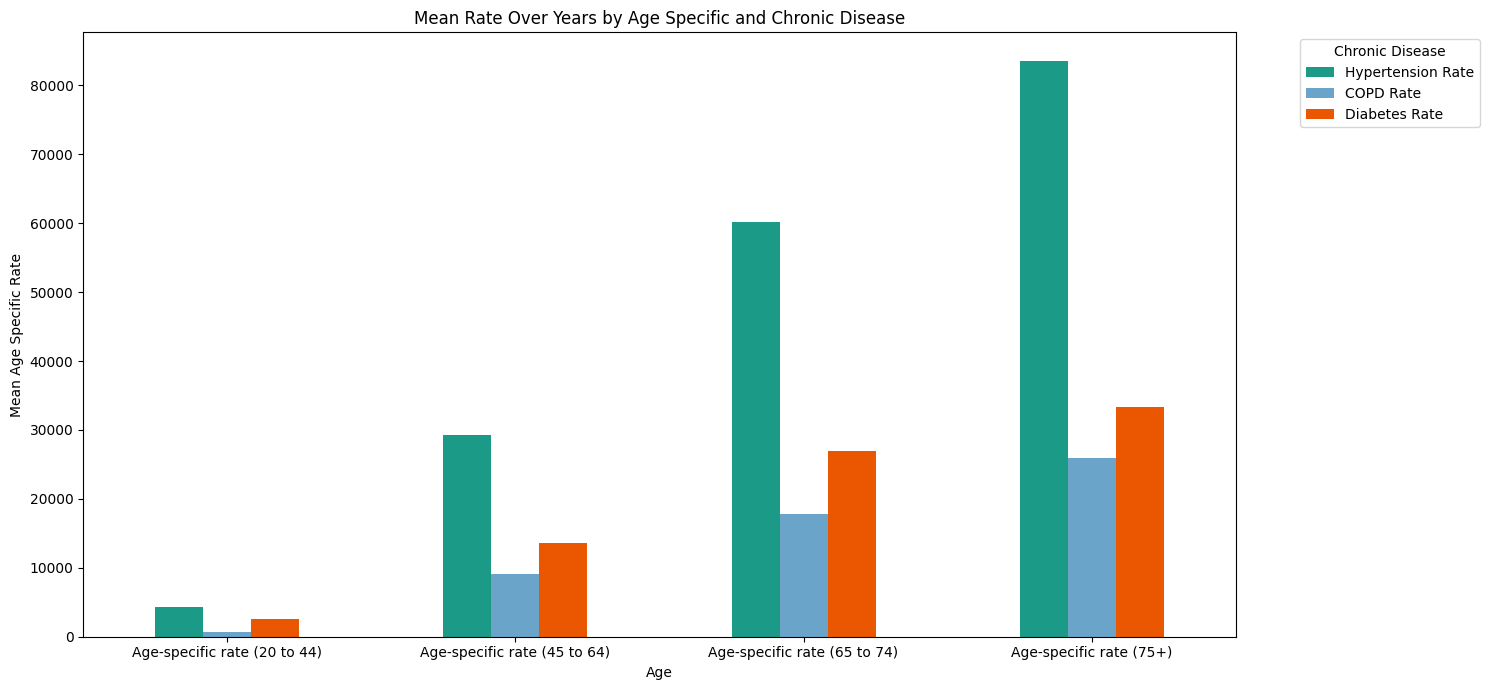

In [28]:
combined_df_age.plot(kind = 'bar', figsize = (15,7), color = ('#1b9a88','#6aa4c9','#eb5600'))  # Line plot with markers
plt.title("Mean Rate Over Years by Age Specific and Chronic Disease")
plt.xlabel("Age")
plt.ylabel("Mean Age Specific Rate")
plt.xticks(rotation=0)
plt.legend(title="Chronic Disease", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In this figure here you can see Chronic disease rates increase significantly with age. In particular, hypertension exhibits a steep rise, reaching over 83,000 per 100,000 in those aged 75 and older. Diabetes follows a similar trajectory, nearly tripling between the 45–64 and 75+ age groups. COPD, while generally lower in absolute rate, also escalates notably in older adults. This emphasizes the need for age-targeted interventions and preventive strategies focused on middle-aged and senior populations.

So, is there any Correlation between these three chronic diseases?

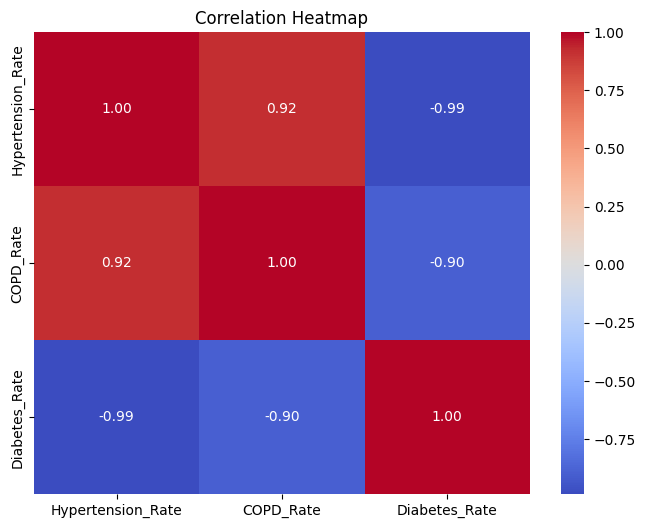

In [29]:
fields = ['Hypertension_Rate', 'COPD_Rate', 'Diabetes_Rate']
correlation_matrix = df[fields].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

This correlation heatmap shows the relationship between the three chronic diseases based on Ontario data. We can clearly see that Hypertension and COPD have strong positive co-relation. Hypertension and Diabetes on the other hand have strong negative co-relation. Same is for COPD and Diabetes as well.

# Statistical Analysis

##GLM (Poission Regression)

###Hypertension as a dependent variable

In [30]:
# Create offset (log of population)
df['log_Hypertension_population'] = np.log(df['Hypertension_Population'])

# Poisson regression with offset and rate predictors
modelGLM1 = sm.GLM(
    df['Hypertension_Count'],
    sm.add_constant(df[['COPD_Rate', 'Diabetes_Rate', 'log_Hypertension_population']]),
    family = sm.families.Poisson()
).fit()

print(modelGLM1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:     Hypertension_Count   No. Observations:                   10
Model:                            GLM   Df Residuals:                        6
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -97.496
Date:                Thu, 24 Jul 2025   Deviance:                       26.929
Time:                        14:24:56   Pearson chi2:                     26.9
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

The Poisson regression model for hypertension-related hospitalizations revealed statistically significant associations with both COPD and diabetes rates. Specifically, as the rates of COPD and diabetes increased, so did the expected count of hypertension hospitalizations, even after adjusting for population size.

###COPD as dependent variable

In [31]:
# Create offset (log of population)
df['log_COPD_population'] = np.log(df['COPD_Population'])

# Poisson regression with offset and rate predictors
modelGLM2 = sm.GLM(
    df['COPD_Count'],
    sm.add_constant(df[['Hypertension_Rate', 'Diabetes_Rate', 'log_COPD_population']]),
    family = sm.families.Poisson()
).fit()

print(modelGLM2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             COPD_Count   No. Observations:                   10
Model:                            GLM   Df Residuals:                        6
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1434.1
Date:                Thu, 24 Jul 2025   Deviance:                       2712.2
Time:                        14:24:56   Pearson chi2:                 2.72e+03
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  19.5753    

Here we have taken COPD Count as a dependent variable.
Interestingly, the model showed a negative relationship between hypertension rate and COPD hospitalizations, suggesting that regions with higher hypertension rates may have lower COPD admission counts. In contrast, the diabetes rate had a strong and highly significant positive effect on COPD hospitalizations


###Diabetes as Dependent Variable


In [32]:
# Create offset (log of population)
df['log_Diabetes_population'] = np.log(df['Diabetes_Population'])

# Poisson regression with offset and rate predictors
modelGLM3 = sm.GLM(
    df['Diabetes_Count'],
    sm.add_constant(df[['Hypertension_Rate', 'COPD_Rate', 'log_Diabetes_population']]),
    family = sm.families.Poisson()
).fit()

print(modelGLM3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         Diabetes_Count   No. Observations:                   10
Model:                            GLM   Df Residuals:                        6
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -297.17
Date:                Thu, 24 Jul 2025   Deviance:                       434.30
Time:                        14:24:56   Pearson chi2:                     434.
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In the third model, we have taken Diabetes Count as a dependent variable. Interestingly, hypertension rate showed a significant negative association, suggesting that in regions with higher hypertension prevalence, diabetes hospitalizations were relatively lower. On the other hand, the COPD rate exhibited a strong positive effect, indicating that areas with higher COPD prevalence also experienced increased diabetes-related hospitalizations—potentially pointing to shared risk factors or overlapping patient populations.

If you remember the correlation heatmap that was shown earlier, what we found out is that the result we got from the correlation heatmap contradicts the result we got from the models.
The first model is showing a strong positive relationship with diabetes, whereas our heatmap is showing a strong -ve relationship between Hypertension and Diabetes.
Also our second model showed a negative relationship between COPD and Hypertension. However they are strongly positively related and similar other differences in the relationship between the chronic diseases can be seen.

Multicolinearity is detected which can cause unstable or misleading regression coefficient and might lead to sign reversal as well, which we are seeing.
To overcome this, we will move now with (Principal Component Analysis) PCA model to avoid the overlapping effects.


##Principal Component Analysis (PCA)

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Hypertension_Rate', 'COPD_Rate', 'Diabetes_Rate']])

In [36]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Add PC1 and PC2 to your dataframe
df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

The PCA reduced the three correlated variables into uncorrelated components, making it easier to detect hidden patterns in the data without the noise of multicollinearity.

###Hypertension Count as Dependent Variable

In [38]:
modelPCA1 = sm.GLM(
    df['Hypertension_Count'],
    sm.add_constant(df[['PC1', 'PC2', 'log_Hypertension_population']]),
    family=sm.families.Poisson()
).fit()

print(modelPCA1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:     Hypertension_Count   No. Observations:                   10
Model:                            GLM   Df Residuals:                        6
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -99.129
Date:                Thu, 24 Jul 2025   Deviance:                       30.194
Time:                        14:38:09   Pearson chi2:                     30.2
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

The first PCA model explains the largest variance, has nearly equal positive loadings for hypertension and COPD, and a nearly equal but negative loading for diabetes. This indicates an inverse pattern—regions with higher hypertension and COPD rates tend to show lower diabetes rates.

###COPD Count as Dependent Variable

In [40]:
modelPCA2 = sm.GLM(
    df['COPD_Count'],
    sm.add_constant(df[['PC1', 'PC2', 'log_COPD_population']]),
    family=sm.families.Poisson()
).fit()

print(modelPCA2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             COPD_Count   No. Observations:                   10
Model:                            GLM   Df Residuals:                        6
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -106.65
Date:                Thu, 24 Jul 2025   Deviance:                       57.378
Time:                        14:38:37   Pearson chi2:                     57.4
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.5660    

The second component emphasized COPD more strongly, suggesting a unique variability in COPD that's not fully aligned with the other two.

###Diabetes Count as Dependent Variable

In [41]:
modelPCA3 = sm.GLM(
    df['Diabetes_Count'],
    sm.add_constant(df[['PC1', 'PC2', 'log_Diabetes_population']]),
    family=sm.families.Poisson()
).fit()

print(modelPCA3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         Diabetes_Count   No. Observations:                   10
Model:                            GLM   Df Residuals:                        6
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -85.574
Date:                Thu, 24 Jul 2025   Deviance:                       11.102
Time:                        14:39:03   Pearson chi2:                     11.1
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

The third component had a strong loading on hypertension and diabetes together, indicating another pattern of co-movement.


Compared to the regression models, which focused on predicting individual disease counts and explained relationships pairwise, PCA gives a more holistic, dimensional view. While regression showed significant pairwise associations, PCA reveals how these diseases cluster together in terms of shared variance, highlighting latent patterns and directional contrasts not captured through traditional modeling. By removing redundancy in the data, PCA helps visualize the interconnectedness of chronic conditions more effectively, making it a valuable tool for exploratory insight and strategic public health planning.


So in conclusion, Our analysis revealed strong interdependencies between these chronic diseases—especially a significant positive correlation between COPD and Hypertension, and an inverse association between Diabetes and Hypertension.